## Json
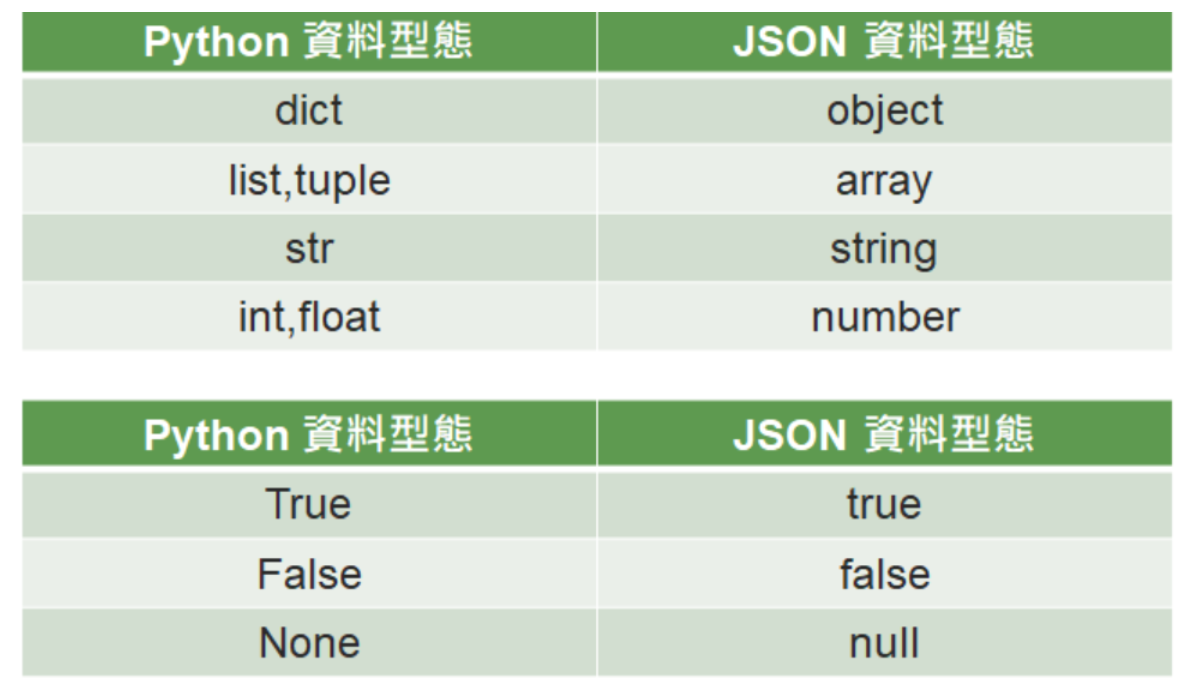
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [5]:
import json
json1 = {"python":"課程","gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))
jsonStr =  json.dumps(json1,ensure_ascii=False)
print(jsonStr)
print(type(jsonStr))

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>
{"python": "課程", "gjun": 100, "python-class": true, "Line": null}
<class 'str'>


In [11]:
import json
json2 = {"python":"課程","gjun":100,"python-class":True,"Line":None}
with open("data0.json","w",encoding="utf-8") as outfile:
    json.dump(json2,outfile,ensure_ascii=False)

In [9]:
import os
os.getcwd()

'C:\\Users\\xvpow\\ai_python20250111\\ch8'

In [17]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
#indent 容易閱讀
with open("data.json","w",encoding="utf-8") as outfile:
    json.dump(data,outfile,ensure_ascii=False,indent=1)


### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [19]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(type(json2))

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
<class 'dict'>


In [20]:
import json
with open("data.json","r",encoding="utf-8") as jsonFile:
    data = json.load(jsonFile)
    for k in data:
        print(f"{k}-{data[k]}")

people-[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [27]:
import os
class TestFile:
    def openFile(self,filePath):
        self.handle = open(filePath,"w")
        self.handle.close()
t = TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

Success


## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [35]:
import os
class TestFile:
    def openFile(self,filePath):
        with open(filePath,"w") as f:
            f.write("Hello")
t = TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

Success


## 壓縮與解壓縮 測試資料

In [46]:
import shutil
import os
try:
    os.mkdir('test2')
    print('建立目錄')
except:
    print('建立目錄失敗')

with open('./test2/test2.txt', 'a') as file2:
    file2.write('Programming is Fun.')
    print('完成附加檔案')
    
with open('./test2/test3.txt', 'a') as file2:
    file2.write('Programiz for beginners')
    print('完成附加檔案')
    
print('查看目錄內容')
os.listdir('./test2')

建立目錄失敗
完成附加檔案
完成附加檔案
查看目錄內容


['test2.txt', 'test3.txt']

## 壓縮與解壓縮
### 但可以於Python程式內運用，可實現以下功能：
#### 建立zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的write()動作將資料夾壓縮。
#### 解壓縮zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的extractall()動作解壓縮。
#### 列出zip壓縮檔案內容
+透過zipfile.ZipFile( )建立物件，再透過物件的namelist()動作查看。

In [43]:
import zipfile
def create_zip(path):
  zf = zipfile.ZipFile(f'{path}.zip', 'w', zipfile.ZIP_DEFLATED)
  for root, dirs, files in os.walk(path):
    for file_name in files:
        zf.write(os.path.join(root, file_name))
        # print("root:",root)
        # print("file_name:",file_name)
        # print(os.path.join(root, file_name))
def ziplist(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  print(zf.namelist())
def extra_zip(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  zf.extractall()

#create_zip("test2")#壓縮資料
ziplist("test2.zip")#查看壓縮資料
extra_zip("test2.zip")#解壓縮資料


['test2/test2.txt', 'test2/test3.txt']


In [47]:
import zipfile
def create_zip(path):
  zf = zipfile.ZipFile(f'{path}.zip', 'w', zipfile.ZIP_DEFLATED)
  for root, dirs, files in os.walk(path):
    for file_name in files:
        zf.write(os.path.join(root, file_name))
        #print("root:",root)
        #print("file_name:",file_name)
        #print(os.path.join(root, file_name))
def ziplist(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  print(zf.namelist())
def extra_zip(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  zf.extractall()

create_zip("test2")#壓縮資料


['test2/test2.txt', 'test2/test3.txt']


In [48]:
ziplist("test2.zip")#查看壓縮資料
extra_zip("test2.zip")#解壓縮資料

['test2/test2.txt', 'test2/test3.txt']


## 爬蟲
pip install beautifulsoup4

pip install html5lib

In [52]:
from bs4 import BeautifulSoup

## BeautifulSoup Base
find() 只找第一個符合條件的

https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/#find-all

find_all() 找所有符合條件的

select_one() 只找一個符合條件的可直接使用css語法

select() 找所有符合條件的可使用css語法

In [62]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1">V1</a>
<a id='a2' class="c1">V2</a>
<a id='a3' class="c3">V3</a>
'''
soup = BeautifulSoup(html,"html5lib")
element1 = soup.find(id="a1")
print(element1)
print(type(element1))
print(soup.find_all(class_="c1"))

<a class="c1" id="a1">V1</a>
<class 'bs4.element.Tag'>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]


In [66]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1" href="https://google.com">Google</a>
<a id='a2' class="c1"  href="https://yahoo.com">Yahoo</a>
<a id='a3' class="c3" href="https://facebook.com">Facebook</a>
'''
soup = BeautifulSoup(html,"html5lib")
print(soup.find(id="a1").getText())
print(soup.find(id="a2").getText())
print(soup.find(id="a3").text)
print(soup.find(id="a1").get("href"))

Google
Yahoo
Facebook
https://google.com


In [68]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1" href="https://google.com">Google</a>
<a id='a2' class="c1"  href="https://yahoo.com">Yahoo</a>
<a id='a3' class="c3" href="https://facebook.com">Facebook</a>
'''
soup = BeautifulSoup(html,"html5lib")
objTag = soup.find_all("a")
for tag in objTag:
    print(tag.text,tag.get("href"))

Google https://google.com
Yahoo https://yahoo.com
Facebook https://facebook.com
<a class="c1" href="https://google.com" id="a1">Google</a>


In [49]:
import requests
from bs4 import BeautifulSoup
url = "https://zh.wikipedia.org/zh-tw/2025年电影"
resp = requests.get(url)
resp.encoding = "utf-8"
soup = BeautifulSoup(resp.text,"html5lib")
#print(resp.text)
moveTabel = soup.find("table",class_="wikitable sortable")
#print(moveTabel)
tbody = moveTabel.find("tbody")
trList = tbody.find_all("tr")
#trList
for inx in range(1,len(trList)):
    print("排名:",trList[inx].find("th").text,end="")
    print("片名:",trList[inx].select_one("a").text)
    print("全球票房:",trList[inx].find_all("td")[-1].text)

排名: 1
片名: 哪吒之魔童鬧海
全球票房: $1,780,640,000[1][2]

排名: 2
片名: 唐探1900
全球票房: $453,300,000[1]

排名: 3
片名: 美國隊長：無畏新世界
全球票房: $208,030,998[3]

排名: 4
片名: 封神第二部：戰火西岐
全球票房: $162,140,000[1]

排名: 5
片名: 熊出沒·重啟未來
全球票房: $102,800,000[1]

排名: 6
片名: 射鵰英雄傳：俠之大者
全球票房: $90,330,000[1]

排名: 7
片名: 超狗神探
全球票房: $87,223,710

排名: 8
片名: 鑽石大劫案：極盜戰
全球票房: $56,129,727

排名: 9
片名: 蛟龍行動
全球票房: $53,790,000[1]



## Numpy簡介

In [11]:
import numpy as np
c1 = [1,3,5,7,8]
d1 = [3,5,6,7,9]
f1 = c1 + d1
print(f1)
c2 = np.array([1,3,5,7,8])
d2 = np.array([3,5,6,7,9])
f2 = c2 + d2
print(f2)
print(type(c2))


[1, 3, 5, 7, 8, 3, 5, 6, 7, 9]
[ 4  8 11 14 17]
<class 'numpy.ndarray'>


+ ndarray.ndim
   + 維度的數量。
+ ndarray.shape
   + 顯示出陣列在每個維度上的整數值。
+ ndarray.size
   + 陣列內元素的總數。
+ ndarray.dtype
   + 用來描述陣列中元素類型的對象。

In [25]:
import numpy as np

#2 x 3
#2意思是軸0有2個元素 3是軸1 意思軸1有3個元素
i = [[1,2,3],
     [1,2,3]]
a = np.array(i,dtype=np.int8)
print(a.ndim)
myShape = a.shape
print(myShape)
print(myShape[0])
print(myShape[1])
print(a.size)
print(a.dtype)

2
(2, 3)
2
3
6
int8


In [27]:
import numpy as np
a = np.array([6,7,8,9])
b = np.arange(4)
print(a)
print(b)
c = a - b
print(c)

[6 7 8 9]
[0 1 2 3]
[6 6 6 6]


In [30]:
f = np.array([5,-1,3,9,0])
print(f <= 3)
print(f[f <= 3])
f[f <= 3] = 1
print(f)

[False  True  True False  True]
[-1  3  0]
[5 1 1 9 1]


In [40]:
import numpy as np
x = np.empty((2,4))
print(x)
print("===========================")
x = np.zeros((2,4))
print(x)
print("===========================")
one = np.ones((2,4))
print(one)
print("===========================")
x = np.full((2,4),8)
print(x)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[8 8 8 8]
 [8 8 8 8]]
